## Cleaning

In [210]:
%run './lib/libraries.ipynb'

dython              0.6.1
tinydb              4.2.0


You should consider upgrading via the '/Users/duane.hinkley/PycharmProjects/c772-capstone-project/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/duane.hinkley/PycharmProjects/c772-capstone-project/venv/bin/python -m pip install --upgrade pip' command.


In [188]:
filterDf  = load_df('filterDf')
cleanDf = filterDf

### Remove unused variables

#### Remove unary learner_attempt_status = "fully scored"

In [189]:
cleanDf = cleanDf.drop('learner_attempt_status')

In [190]:
finish_todo('Remove unary learner_attempt_status = "fully scored"')

#### Remove variables assignment_late_submission, is_manual_scoring_required and is_deleted

In [191]:
cleanDf = cleanDf.drop('assignment_late_submission', 'is_manual_scoring_required', 'is_deleted')

In [192]:
finish_todo('Remove variables assignment_late_submission, is_manual_scoring_required and is_deleted')

#### Remove assignment_attempt_number and assignment_max_attempts

In [193]:
cleanDf = cleanDf.drop("assignment_attempt_number", "assignment_max_attempts")

In [194]:
finish_todo('Remove assignment_attempt_number and assignment_max_attempts')

#### Remove 3298 null values in response_correctness

In [195]:
#
cleanDf = cleanDf.filter(~F.col('response_correctness').isNull() )

In [196]:
finish_todo('Remove 3298 null values in response_correctness')

#### Remove attempt stop dates before start date

In [197]:
cleanDf = cleanDf.filter( F.col('item_attempt_start_datetime_utc') < F.col('item_attempt_end_datetime_utc') )

In [198]:
finish_todo('Remove attempt stop dates before start date')

#### Remove 1566 [unassigned] in response_correctness

In [199]:
cleanDf = cleanDf.filter( F.col('response_correctness') != '[unassigned]' )

In [200]:
finish_todo("Remove 1566 [unassigned] in response_correctness")

### Impute

#### Impute number_of_learners with calculated values
- Impute the full dateset with recalculated number_of_learners

In [201]:
cleanDf = impute_number_of_learners(cleanDf)

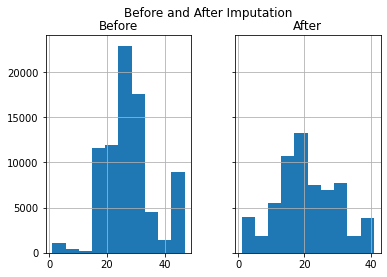

In [202]:
dual_hist(
    filterDf.select('number_of_learners').toPandas(),
    cleanDf.select('number_of_learners').toPandas(),
    title1='Before',
    title2='After',
    main='Before and After Imputation'
)

In [203]:
finish_todo("Impute number_of_learners with calculated values")

#### Impute 3422 null dates in scored_datetime

In [206]:
imputeDf = impute_3422_null_dates(cleanDf)

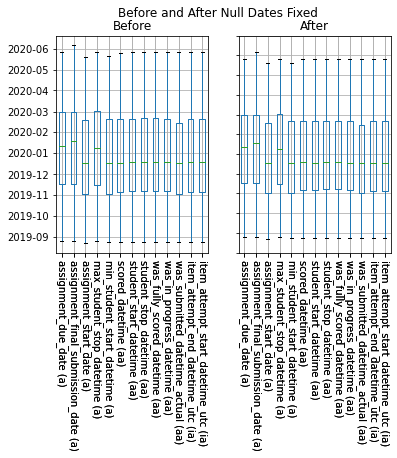

In [207]:
dual_date_boxplot(
    get_random_sample(cleanDf),
    get_random_sample(imputeDf),
    title1='Before',
    title2='After',
    main='Before and After Null Dates Fixed'
)

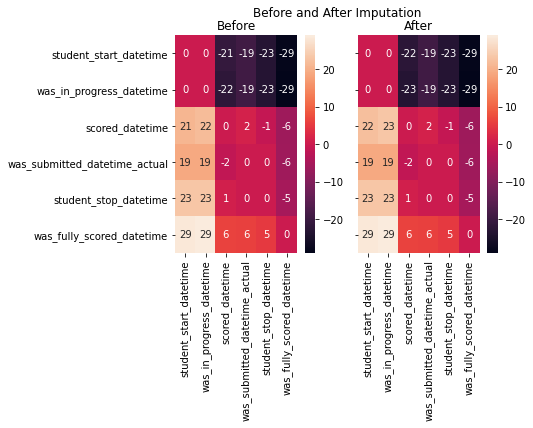

In [208]:
dual_mean_hours_assignment(
    get_random_sample(cleanDf),
    get_random_sample(imputeDf),
    title1 = 'Before',
    title2 = 'After',
    main = 'Before and After Imputation'
)

Before and After Values Match
- student_stop_datetime  & scored_datetime = 1

In [209]:
cleanDf = imputeDf
finish_todo('Impute 3422 null dates in scored_datetime')

#### Impute 4446 of 18469 null dates in was_submitted_datetime_actual

In [211]:
imputeDf = impute_4446_null_dates(cleanDf)

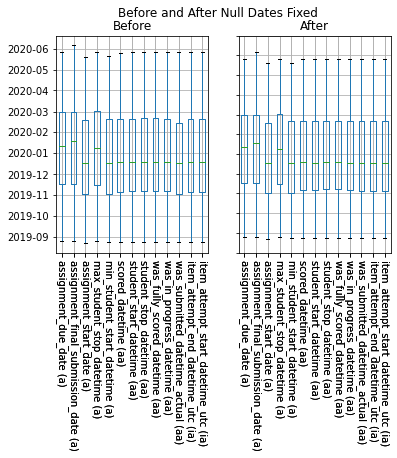

In [212]:
dual_date_boxplot(
    get_random_sample(cleanDf),
    get_random_sample(imputeDf),
    title1='Before',
    title2='After',
    main='Before and After Null Dates Fixed'
)

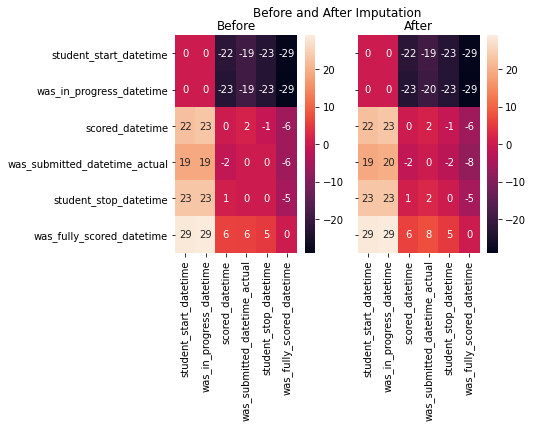

In [213]:
dual_mean_hours_assignment(
    get_random_sample(cleanDf),
    get_random_sample(imputeDf),
    title1 = 'Before',
    title2 = 'After',
    main = 'Before and After Imputation'
)

Values corrected
- The corrected values adjusted the mean values of was_submited_datetime_actual up ~1 to 3 hours for related variables


In [162]:
cleanDf = imputeDf

finish_todo('Impute 4446 of 18469 null dates in was_submitted_datetime_actual')

#### Impute 749 t0 750 null dates
Impute null dates
   - in
      - student_start_datetime
      - student_stop_datetime
      - was_fully_scored_datetime

- Before

In [163]:
date_statisticts(cleanDf, ['student_start_datetime', 'student_stop_datetime' , 'was_fully_scored_datetime'])

,distinct,null,min,max
student_start_datetime,6778,427,2019-08-23,2020-05-26
student_stop_datetime,6600,427,2019-08-23,2020-05-26
was_fully_scored_datetime,6732,428,2019-08-23,2020-05-26


In [164]:
cleanDf = impute_749_to_750_null_dates(cleanDf)

# Delete any remaining nulls to make sure other varaibles are not imputed using these
cleanDf = cleanDf.filter( (F.col('student_start_datetime').isNull() == False ) & (F.col('student_stop_datetime').isNull() == False ) & (F.col('was_fully_scored_datetime').isNull() == False ) )

After

In [165]:
date_statisticts(cleanDf, ['student_start_datetime', 'student_stop_datetime' , 'was_fully_scored_datetime'])

,distinct,null,min,max
student_start_datetime,6812,0,2019-08-23,2020-05-26
student_stop_datetime,6634,0,2019-08-23,2020-05-26
was_fully_scored_datetime,6766,0,2019-08-23,2020-05-26


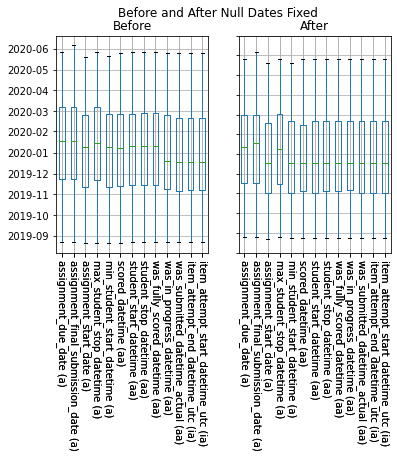

In [166]:
dual_date_boxplot(
    get_random_sample(filterDf),
    get_random_sample(cleanDf),
    title1='Before',
    title2='After',
    main='Before and After Null Dates Fixed'
)

- Median changes
  - assignment_start_date

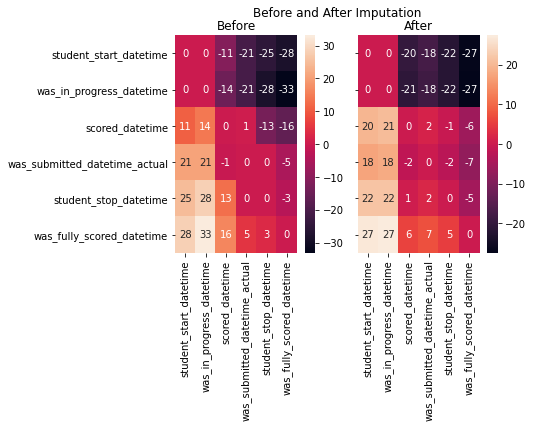

In [141]:
dual_mean_hours_assignment(
    get_random_sample(filterDf),
    get_random_sample(cleanDf),
    title1 = 'Before',
    title2 = 'After',
    main = 'Before and After Imputation'
)

Before and After Values Match
- student_start_datetime & scored_datetime = 9
- student_stop_datetime  & scored_datetime = -12
- was_fully_scored_datetime & scored_datetime = -17

In [74]:
finish_todo('Impute 749 t0 750 null dates')


#### Impute 9965 null dates in was_in_progress_datetime

In [79]:
cleanDf = impute_9965_null_dates(cleanDf)

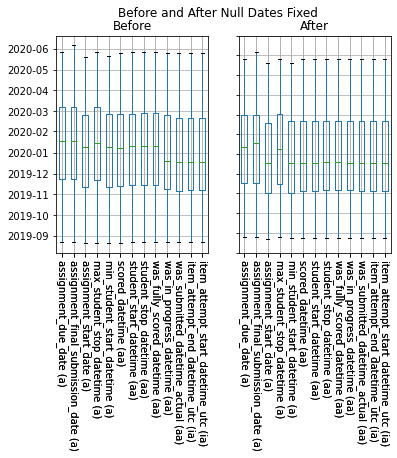

In [80]:
dual_date_boxplot(
    get_random_sample(filterDf),
    get_random_sample(cleanDf),
    title1='Before',
    title2='After',
    main='Before and After Null Dates Fixed'
)

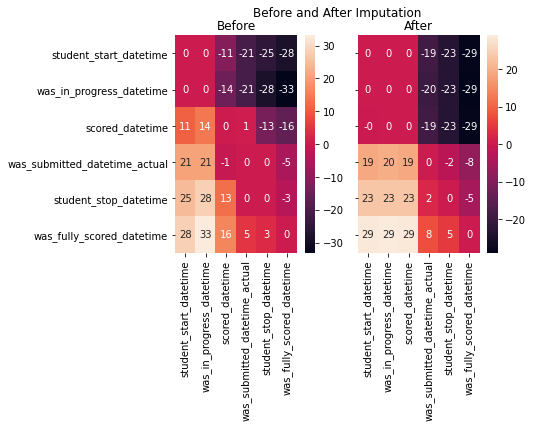

In [81]:
dual_mean_hours_assignment(
    get_random_sample(filterDf),
    get_random_sample(cleanDf),
    title1 = 'Before',
    title2 = 'After',
    main = 'Before and After Imputation'
)

Before and After Values Match
- student_start_datetime  & was_in_progress_datetime = -12

In [82]:
finish_todo('Impute 9965 null dates in was_in_progress_datetime')


#### Reduce number of levels in item_type_code_name

###### Categories before

In [83]:
# Before Categories
cleanDf.select("item_type_code_name").distinct().orderBy("item_type_code_name").show(50, False)


+-------------------+
|item_type_code_name|
+-------------------+
|aheAlgo            |
|bucketing          |
|choiceMatrix       |
|cloze              |
|equationEntry      |
|essay              |
|fileUpload         |
|fillInTheBlank     |
|graphing           |
|imageLabel         |
|matching           |
|multipleChoice     |
|multipleSelect     |
|numberLine         |
|selectText         |
|shortAnswer        |
|sortable           |
|trueFalse          |
+-------------------+



In [84]:
cleanDf = reduce_type_code_levels(cleanDf)

###### Categories after

In [85]:
# Display new values
cleanDf.groupBy("item_type_code_name").count().orderBy("count", ascending=False).show(50, False)

+-------------------+-----+
|item_type_code_name|count|
+-------------------+-----+
|multipleChoice     |26704|
|Other              |13630|
|fillInTheBlank     |10494|
|equationEntry      |7841 |
|trueFalse          |4561 |
+-------------------+-----+



In [86]:
finish_todo('Reduce number of levels in item_type_code_name')


In [87]:
save_df(cleanDf, 'cleanDf')